<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/18_Pandas_Explode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
df.head()

## if we didnt want to use explode


In [ ]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)

df_skill_lists.loc['Total'] = df_skill_lists.sum()

df_skill_lists.iloc[:, 2:]

## explode:

In [ ]:
df_exploded = df.explode('job_skills')
type(df_exploded)

pandas.core.frame.DataFrame

In [ ]:
df_exploded = df.explode('job_skills').reset_index(drop=True)
df_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
3,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
4,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777315,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777316,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777317,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777318,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


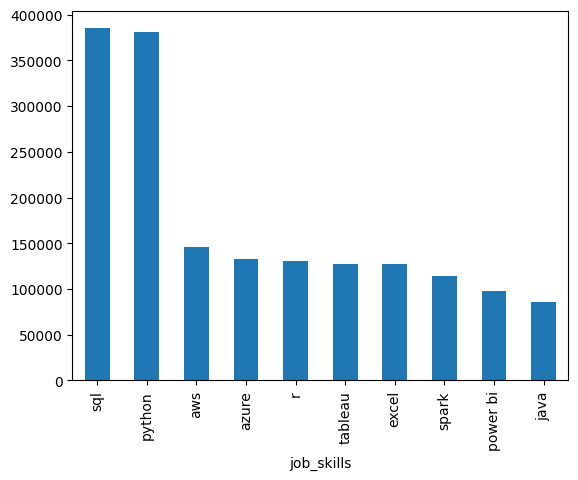

pandas.core.frame.DataFrame

In [ ]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()
type(df_exploded)

In [ ]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [ ]:
type(skills_count)

pandas.core.series.Series

these two formulas differ:


first one is for changing series into dataframe


second one is for resetting the index

In [ ]:
help(pd.Series.reset_index)

Help on function reset_index in module pandas.core.series:

reset_index(self, level: 'IndexLabel | None' = None, *, drop: 'bool' = False, name: 'Level' = <no_default>, inplace: 'bool' = False, allow_duplicates: 'bool' = False) -> 'DataFrame | Series | None'
    Generate a new DataFrame or Series with the index reset.
    
    This is useful when the index needs to be treated as a column, or
    when the index is meaningless and needs to be reset to the default
    before another operation.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default optional
        For a Series with a MultiIndex, only remove the specified levels
        from the index. Removes all levels by default.
    drop : bool, default False
        Just reset the index, without inserting it as a column in
        the new DataFrame.
    name : object, optional
        The name to use for the column containing the original Series
        values. Uses ``self.name`` by default. This argument is i

In [ ]:
help(pd.DataFrame.reset_index)


Help on function reset_index in module pandas.core.frame:

reset_index(self, level: 'IndexLabel | None' = None, *, drop: 'bool' = False, inplace: 'bool' = False, col_level: 'Hashable' = 0, col_fill: 'Hashable' = '', allow_duplicates: 'bool | lib.NoDefault' = <no_default>, names: 'Hashable | Sequence[Hashable] | None' = None) -> 'DataFrame | None'
    Reset the index, or a level of it.
    
    Reset the index of the DataFrame, and use the default one instead.
    If the DataFrame has a MultiIndex, this method can remove one or more
    levels.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default.
    drop : bool, default False
        Do not try to insert index into dataframe columns. This resets
        the index to the default integer index.
    inplace : bool, default False
        Whether to modify the DataFrame rather than creating a new one.
    col_level : 

In [ ]:
df_skills_count = skills_count.reset_index(name='countttt') # we need to rename the main Series value


In [ ]:
df_skills_count

,job_title_short,job_skills,countttt
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [ ]:
df_skills_count.index

RangeIndex(start=0, stop=2256, step=1)

In [ ]:
df_skills_count= df_skills_count.sort_values(by='countttt',ascending=False)

df_skills_count

,job_title_short,job_skills,countttt
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [ ]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_title_short,job_skills,countttt
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


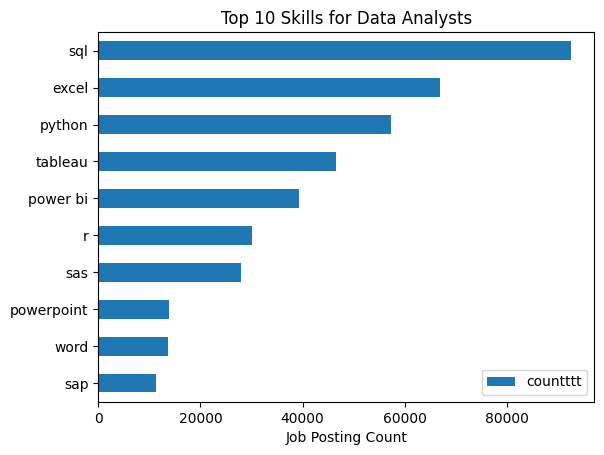

In [ ]:
df_skill_final.plot(kind='barh', x='job_skills', y='countttt')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(True)
plt.show()
